# Steady state model

## Description of building 

The chosen building is a studio apartment with one main living room and a bathroom. The building is located in France with the glazed wall facing south.

![Floor scetch of building](front.jpeg)

Furthermore the entire building has been divided into two zones. As seen in the following table, the first zone is the living room/kitchen area whilst the other zone is a bathroom. The total area of the apartment is 35 $m^2$.
| Area                                | Surface [m²] |
|-------------------------------------|--------------|
| Zone 1 (Living room/kitchen)       | 25           |
| Zone 2 (Bathroom)                  | 10           |

In [1]:
import numpy as np
import pandas as pd

air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/(kg·K)
pd.DataFrame(air, index=['Air'])

,Density,Specific heat
Air,1.2,1000


The exterior walls are compossed with a layer of concrete followed by a layer of insulation with the following parameters:
| Material     | Thickness [cm] | Thermal conductivity λ [W/mK] | Specific heat c [J/kgK] | Volumetric mass density ρ [kg/m³] |
|--------------|----------------|-------------------------------|--------------------------|-----------------------------------|
| Concrete     | 20             | 1,4                           | 960                      | 2300                              |
| Insulation   | 10             | 0,027                         | 840                      | 50                                |


In [2]:
concrete_extern_salon = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.2,                   # m
            'Surface': 5*3*2}            # m²

In [3]:
insulation_salon = {'Conductivity': 0.027,        # W/(m·K)
              'Density': 50.0,              # kg/m³
              'Specific heat': 840,        # J/(kg⋅K)
              'Width': 0.1,                # m
              'Surface': 5*2*3}          # m²

In [4]:
concrete_extern_bathroom = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.2,                   # m
            'Surface': 5*3+2*3}            # m²

insulation_bathroom = {'Conductivity': 0.027,        # W/(m·K)
              'Density': 50.0,              # kg/m³
              'Specific heat': 840,        # J/(kg⋅K)
              'Width': 0.1,                # m
              'Surface': 5*3+2*3}          # m²

*Source: [Engineering Toolbox - Specific Heat of Solids](https://www.engineeringtoolbox.com/specific-heat-solids-d_154.html)*

The interior walls are as follows:

| Material     | Thickness [cm] | Thermal conductivity λ [W/mK] | Specific heat c [J/kgK] | Volumetric mass density ρ [kg/m³] |
|--------------|----------------|-------------------------------|--------------------------|-----------------------------------|
| Concrete     | 7.5             | 1,4                           | 960                      | 2300                              |
                                               

In [5]:
concrete_intern_salon = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.075,                   # m
            'Surface': 5*3}            # m²

In [6]:
concrete_intern_bathroom = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.075,                   # m
            'Surface': 5*3}            # m²

To simplify the model both the exterior and the interior doors have been modelled the same way.

| Material     | Thickness [cm] | Thermal conductivity λ [W/mK] | Specific heat c [J/kgK] | Volumetric mass density ρ [kg/m³] |
|--------------|----------------|-------------------------------|--------------------------|-----------------------------------|
| Wood         | 5              | 0,17                          | 2000                     | 800                              |


In [7]:
door = {'Conductivity' : 0.17,
        'Width' : 5,
        'Surface' : 0.9*2.1,
        'Specific heat' : 2000,
        'Density' : 800 }

The windows are double glazed and have the following parameters 
| Material     | Thickness [cm] | Energy transmittance e | Specific heat c [J/kgK] | Volumetric mass density ρ [kg/m³] |
|--------------|----------------|-------------------------------|--------------------------|-----------------------------------|
| Window     | 2,4             | 0,75                          | 1210                      | 2500                              |


In [8]:
glass_salon = {'Conductivity': 1.4,               # W/(m·K)
         'Density': 2500,                   # kg/m³
         'Specific heat': 1210,             # J/(kg⋅K)
         'Width': 0.024,                     # m
         'Surface': 5*3}                   # m²

In [9]:
glass_bathroom = {'Conductivity': 1.4,               # W/(m·K)
         'Density': 2500,                   # kg/m³
         'Specific heat': 1210,             # J/(kg⋅K)
         'Width': 0.024,                     # m
         'Surface': 2*3}                   # m²

The apartment is also assumed to be part of an apartment complex, with apartments under and over. This assumption makes the heat transfer from the ceilings and floors neglectable.

In [10]:
ceiling_soil_bathroom = {                    # m
         'Surface': 2*5*2}  

ceiling_soil_salon = {                    # m
         'Surface': 2*5*5}  

The different rooms are assembled as follows:

In [11]:
wall_salon = pd.DataFrame.from_dict({'Layer_out': concrete_extern_salon,
                                     'Layer_out1': concrete_intern_bathroom,
                               'Layer_in': insulation_salon,
                               'Layer_in1': insulation_bathroom,
                               'Glass': glass_salon,
                               'Glass1': glass_bathroom,
                               'Layer_out2' : concrete_extern_bathroom,
                               'roof' : ceiling_soil_bathroom,
                               'roof1' : ceiling_soil_salon,
                               'door' : door
                               },
                              orient='index')
wall_salon

wall_bathroom = pd.DataFrame.from_dict({'Layer_out': concrete_extern_salon,
                                     'Layer_out1': concrete_intern_bathroom,
                               'Layer_in': insulation_salon,
                               'Layer_in1': insulation_bathroom,
                               'Glass': glass_salon,
                               'Glass1': glass_bathroom,
                               'Layer_out2' : concrete_extern_bathroom,
                               'roof' : ceiling_soil_bathroom,
                               'roof1' : ceiling_soil_salon,
                               'door' : door
                               },
                              orient='index')
wall_bathroom


,Conductivity,Density,Specific heat,Width,Surface
Layer_out,1.400,2300.0,960.0,0.200,30.00
Layer_out1,1.400,2300.0,960.0,0.075,15.00
Layer_in,0.027,50.0,840.0,0.100,30.00
Layer_in1,0.027,50.0,840.0,0.100,21.00
Glass,1.400,2500.0,1210.0,0.024,15.00
Glass1,1.400,2500.0,1210.0,0.024,6.00
Layer_out2,1.400,2300.0,960.0,0.200,21.00
door,0.170,800.0,2000.0,5.000,1.89
roof,NaN,NaN,NaN,NaN,20.00
roof1,NaN,NaN,NaN,NaN,50.00


## Hypothesis   

In this study, several simplifying assumptions were made to facilitate the thermal modeling of the apartment:
- The apartment is also assumed to be part of an apartment complex, with apartments under and over. This assumption makes the heat transfer from the ceilings and floors neglectable.
- The building is located in France with the glazed wall facing south.
- Neglect long wave radiation because $$
G_{LW} = \sigma T^3 \varepsilon \approx 0.135 \ \text{W·K}^{-1} \ll G_{\text{conduction}} \approx 200 \ \text{W·K}^{-1} \quad \text{and} \quad G_{\text{convection}} \approx 60 \ \text{W·K}^{-1}
$$
- We assume no heat transfer through the east wall, as the corridor has a similar and stable temperature.
-We consider the door between the two rooms to be opaque to radiation, meaning no radiative heat transfer occurs through it. 


## Thermal model 

The previously described building is depicted using nodes and flows by the following model.

![Thermal Model](thermal.png)

*Figure 1: Thermal mode*

h is the convection coefficient for the walls. The surface resistance on the inside is 8 $W/(m^2K)$ and for the outside surface the value is 25 $ W/(m^2K) $  .

In [12]:
σ = 5.67e-8     # W/(m²⋅K⁴) Stefan-Bolzmann constant

h = pd.DataFrame([{'in': 8., 'out': 25}], index=['h'])  # W/(m²⋅K)
h

,in,out
h,8.0,25



The volumetric flow rate of the air, $ \mathrm{m}^3/\mathrm{s} $, with the following equation:


$ \dot{V}_a = \frac{\mathrm{ACH}}{3600} V_a $

Where ACH is the air changes per hours, 1/h

$ V_a $ is the volume of the air, $ m^3 $ 

and 3600 is the number of seconds in one hour

# Controller 

The model utilizes a proportional heater, which is a simple representation of a controller. 

$$q_{HVAC} = K_p (T_{i, sp} - \theta_i)$$

It works by changing the heat flow rate $q_{HVAC}$, in order to controll the indoor temperature $\theta_i$ to its setpoint temperature $T_{i,sp}$. 

The $ K_p $ value, the proportional gain of the controller, was chosen to 1000. This represents an almost perfect controller.

In [13]:
# ventilation flow rate
Va_bathroom = 5*2*3                 # m³, volume of air
Va_salon = 5*5*3                 # m³, volume of air
ACH = 1                     # 1/h, air changes per hour
Va_dot_bathroom = ACH / 3600 * Va_bathroom  # m³/s, air infiltration
Va_dot_salon = ACH / 3600 * Va_salon  # m³/s, air infiltration
Kp = 1000 # W/K

The test was done three times with three different temperatures, 0°C 15°C and 30°C.

In [14]:
T0=30 #données météo
Tisp=19 # à déinir
air_bathroom = {'Conductivity': 1.4,               # W/(m·K)
          'Density': 1.2,                      # kg/m³                  
          'Specific heat': 1000,             # J/(kg⋅K)
          'Volume': 30, }                    # m^3

air_salon = {'Conductivity': 1.4,               # W/(m·K)
          'Density': 1.2,                      # kg/m³                  
          'Specific heat': 1000,             # J/(kg⋅K)
          'Volume': 75, }                    # m^3

In the thermal model, each material is depicted using two resistances and a node. The nodes correspond to the temperatures in volumes, points or surfaces. In this case the temperatures in the air, materials in walls and windows and set point temperatures. The branches corresponds to the heat flow rate between the temperature nodes.

The equation to solve is as follows:

$$
C \dot{\theta} = -(A^T GA) \theta + A^T Gb + f
$$

To find the steady state solution,

$$
\dot{\theta} = 0
$$

## Steady state model

Matrix A defines the direction of flows between nodes. The rows correspond to individual flows, while the columns represent each node. A value of 1 indicates that a node receives the flow, whereas -1 signifies that the flow is leaving the node.

In [15]:
nr = 27
nc= 20

A = np.zeros([nr, nc])

A[0, 5] = 1
A[1, 9] = 1
A[2, 0] = 1

j=0
for i in range(3,13):
    A[i,j], A[i,j+1] = -1, 1
    j+=1
    
A[13, 10] = 1
A[14, 14], A[14, 5] = -1, 1
A[14, 14], A[14, 5] = -1, 1
A[15, 5], A[15, 11] = -1, 1
A[16, 11], A[16, 12] = -1, 1
A[17, 12], A[17, 13] = -1, 1
A[18, 13], A[18, 9] = -1, 1
A[19, 15], A[19, 9] = -1, 1
A[20, 14] = 1
 
j=15
for i in range(21,25):
    A[i,j+1], A[i,j] = -1, 1
    j+=1
    
A[25, 19] = 1
A[26, 9] = 1

Matrix G is a square matrix where each row and column correspond to a specific flow. It is a diagonal matrix, with each diagonal element representing the conductance (G-value) of the respective flow. The following equations are used for this:

$$
G_{\text{cond}} = S \frac{\lambda}{w}
$$

and

$$
G_{\text{cv}} = hS
$$

For the ventilation, the conductance for ventilation/infiltration is calculated using the following equation 

$$ G_v = \rho_a c_a \dot{V}_a $$
with $\rho_a$ being the density of the air, the volumetric flow rate of the air is $\dot{V}_a$ and $c_a$ is the specific heat capacity of the air. 

In [16]:
G = np.zeros((27,27))

In [17]:
# ventilation & advection
G[0,0]= air['Density'] * air['Specific heat'] * Va_dot_bathroom
G[26,26] = air['Density'] * air['Specific heat'] * Va_dot_salon
G[1,1]=Kp
G[2,2] = h['out'] * (wall_bathroom['Surface'].iloc[6]-3*2)     # on enlève la partie du mur négligée
G[3,3] = 2*(wall_bathroom['Surface'].iloc[6]-3*2)*wall_bathroom['Conductivity'].iloc[6]/wall_bathroom['Width'].iloc[6]    # on enlève la partie du mur négligée
G[4,4] = G[3,3]
G[5,5]= 2*(wall_bathroom['Surface'].iloc[3]-3*2)*wall_bathroom['Conductivity'].iloc[3]/wall_bathroom['Width'].iloc[3]     # on enlève la partie du mur négligée
G[6,6] = G[5,5]
G[7,7]= h['in'] * (wall_bathroom['Surface'].iloc[3]-3*2)  # on enlève la partie du mur négligée
G[8,8]=h['in'] * wall_bathroom['Surface'].iloc[1]
G[9,9]=2*wall_bathroom['Surface'].iloc[1]*wall_bathroom['Conductivity'].iloc[1]/wall_bathroom['Width'].iloc[1]
G[10,10]=2*wall_bathroom['Surface'].iloc[1]*wall_bathroom['Conductivity'].iloc[1]/wall_bathroom['Width'].iloc[1]
G[11,11]= h['in'] * wall_salon['Surface'].iloc[1]
G[12,12]= h['in'] * wall_salon['Surface'].iloc[4]
G[13,13]= h['out'] * wall_salon['Surface'].iloc[4]
G[14,14]= h['in'] * wall_bathroom['Surface'].iloc[5]
G[15,15]= h['in'] * wall_bathroom['Surface'].iloc[9]
G[16,16]= 2*door['Surface']*door['Conductivity']/door['Width']
G[17,17]=G[16,16]
G[18,18]= h['in'] * wall_salon['Surface'].iloc[9]
G[19,19]= h['in'] * (wall_salon['Surface'].iloc[2]-5*3)
G[20,20]= h['out'] * wall_bathroom['Surface'].iloc[5]
G[21,21]= 2*(wall_salon['Surface'].iloc[2]-5*3)*wall_bathroom['Conductivity'].iloc[2]/wall_bathroom['Width'].iloc[2]
G[22,22]=G[21,21]
G[23,23]=2*(wall_salon['Surface'].iloc[0]-5*3)*wall_bathroom['Conductivity'].iloc[0]/wall_bathroom['Width'].iloc[0]
G[24,24]= G[23,23]
G[25,25]=h['out'] * wall_salon['Surface'].iloc[0]

C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\81022461.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[2,2] = h['out'] * (wall_bathroom['Surface'].iloc[6]-3*2)     # on enlève la partie du mur négligée
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\81022461.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[7,7]= h['in'] * (wall_bathroom['Surface'].iloc[3]-3*2)  # on enlève la partie du mur négligée
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\81022461.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[8,8]=h['in'] * wall_bathroom['Surface'].iloc[1]
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\81022461.py:14: FutureWarning: Calling float on a single elemen

Similarly, matrix C shares the same structure as matrix G, but instead of representing flows, its rows and columns correspond to nodes. The diagonal elements of C represent the capacity at each node:

$$
C = \rho c w S
$$

Vector b is a column vector with as many rows as the number of flows. It represents the external temperature sources, which are the only temperature sources in the system. The values in b correspond to the external temperatures. If a flow is influenced by an external temperature source, the corresponding value in b will be the external temperature for that flow. 

The vector f consists of rows, each corresponding to a different node. It represents the external flows at each node. The value of each entry in the vector corresponds to the size of the external source at that node. If the node has no external source, the value is 0. 

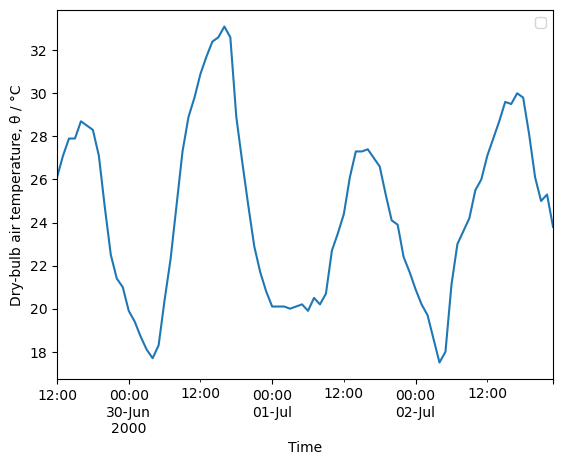

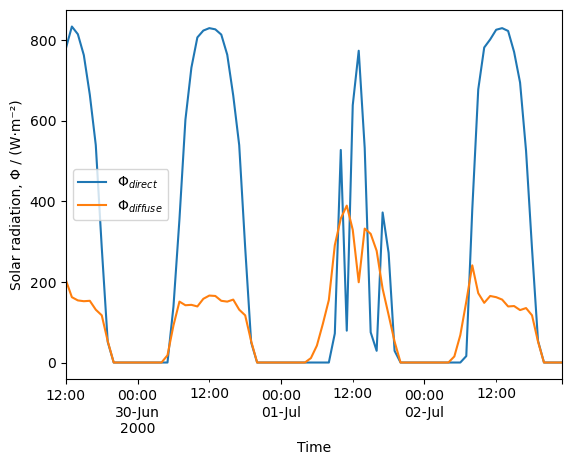

Ew = 391.48830154811293
Es = 306.6959234776412
En = 150.04846078311556


In [18]:
from calcul_E import E_f

Es, Ew, En = E_f[0], E_f[1], E_f[2]

print("Ew =", Ew)
print("Es =", Es)
print("En =", En)

In [19]:
# ----- b and f vectors -----
f = np.zeros(20)
b = np.zeros(27)
b[0]=b[2]=b[13]=b[20]=b[25]=T0
b[1]=Tisp    

# radiative properties
ε_wLW = 0.85    # long wave emmisivity: wall surface (concrete)
ε_gLW = 0.90    # long wave emmisivity: glass pyrex
α_wSW = 0.25    # short wave absortivity: white smooth surface
α_gSW = 0.38    # short wave absortivity: reflective blue glass
τ_gSW = 0.30    # short wave transmitance: reflective blue glass

# view factor
Fwall_ground = 0.5
Fwall_sky = 0.5
Fw_externgbathroom = (concrete_extern_bathroom['Surface']-3*2) / (glass_bathroom['Surface']+concrete_intern_bathroom['Surface']+ceiling_soil_bathroom['Surface'])
Fw_interngbathroom = (concrete_intern_bathroom['Surface']) / (glass_bathroom['Surface']+concrete_extern_bathroom['Surface']+ceiling_soil_bathroom['Surface'])
Fw_externgsalon = (concrete_extern_salon['Surface']-3*5) / (glass_salon['Surface']+concrete_intern_salon['Surface']+ceiling_soil_salon['Surface'])
Fw_interngsalon = (concrete_intern_salon['Surface']) / (glass_salon['Surface']+concrete_extern_salon['Surface']+ceiling_soil_salon['Surface'])

phi0 = Fwall_sky*En*(concrete_extern_bathroom['Surface']-2*3)*α_wSW
phi14 = Fwall_sky*Ew*glass_bathroom['Surface']*α_gSW
phi10 = Fwall_sky*Es*glass_salon['Surface']*α_gSW
phi19 = Fwall_sky*Ew*concrete_extern_salon['Surface']*α_wSW/2
phi4 = Fw_externgbathroom*phi14*τ_gSW*α_wSW
phi6 = Fw_interngbathroom*phi14*τ_gSW*α_wSW
phi8 = Fw_interngsalon*phi10*τ_gSW*α_wSW
phi15 = Fw_externgsalon*phi10*τ_gSW*α_wSW
Qa1 = 90+70 # one standing people and some machine in W
Qa2 = 90 # one standing people in W

f=[phi0, 0, 0, 0, phi4, Qa2, phi6, 0, phi8, Qa1, phi10, 0, 0, 0, phi14, phi15, 0, 0, 0, phi19 ]

The auxiliary heat gains, $  Q_{ai}  $, are added to each of the zones and represent the heat flow from the inhabitants and also heat gain from cooking and electronics. The heat gain from the inhabitants was estimated at 90 W.

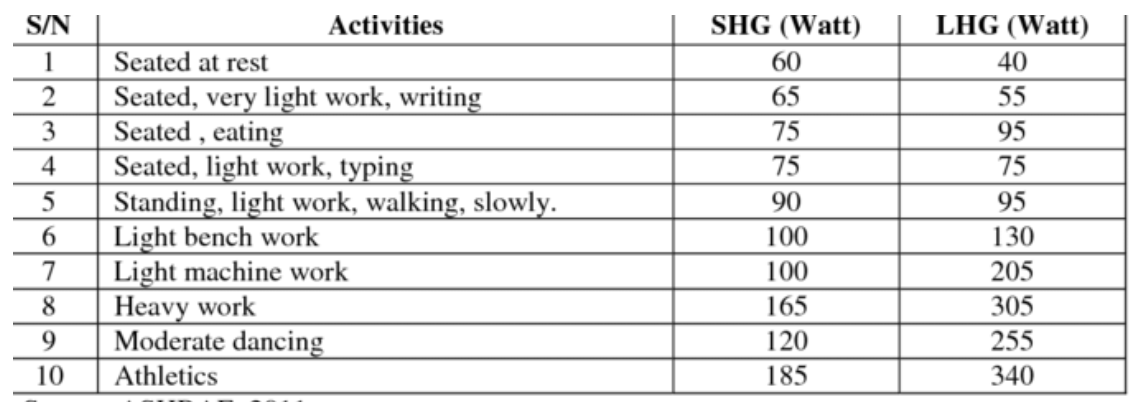

**Figure 2: Sensible and Latent Heat Gain**

In [20]:
from IPython.display import display, Image, Markdown

display(Image(filename="table1.png"))
display(Markdown("**Figure 2: Sensible and Latent Heat Gain**"))

*Source: [Scientific Figure - Computer-Aided Load Estimation of Air-conditioning Systems for Non-residential and Residential Buildings](https://www.researchgate.net/figure/Sensible-Heat-Gain-SHG-and-Latent-Heat-Gain-LHG-in-respect-of-human-activities_tbl1_327228047 )*

Heat gain from cooking and electronics was estimated to 70 W. 
With these matrices implemented it is possible to perform the stead state calculations.

# Radiation

The long-wave radiation was calculated using the following:

$$ G = \sigma T^3 \epsilon \approx 0.135 $$

When comparing this value with the convection 

$$
G_{\text{cv}} = hS \approx 60
$$

and with the value for the conduction 

$$
G_{\text{cond}} = S \frac{\lambda}{w} \approx 200
$$

it is noticeable that the value of the long-wave radiation is neglectable. 

## Results of steady state

In [21]:
# temperature nodes
nθ = 20      # number of temperature nodes
θ = [f'θ{i}' for i in range(nθ)]

# flow-rate branches
nq = 27     # number of flow branches
q = [f'q{i}' for i in range(nq)]


θ = np.linalg.inv(A.T @ G @ A ) @ (A.T @ G @ b + f)
print(f'θ = {np.around(θ, 1)} °C')

a=wall_bathroom['Width'].iloc[3]
print(a , 'test')

print(f'Bathroom = {np.around(θ[5], 1)} °C')
print(f'Living room = {np.around(θ[9], 1)} °C')

θ = [30.7 30.7 30.6 29.1 27.6 27.4 24.5 23.9 23.2 20.2 29.4 27.4 23.8 20.2
 31.6 20.6 25.6 30.5 30.7 30.9] °C
0.1 test
Bathroom = 27.4 °C
Living room = 20.2 °C


# Discussion

The simulation results are considered realistic given the assumption that a temperature controller is only placed in the living room. This design choice leads to significant temperature differences between rooms. If an additional controller had been placed in the bathroom, these differences would likely have been reduced. Moreover, the decision to model the interior door as opaque further contributes to the temperature disparity, as the door is assumed not to allow any heat transfer, effectively acting as a solid barrier.

In the current model, the primary factor influencing the indoor temperature is the outdoor temperature. Additionally, the large glazed area contributes to increased indoor temperatures due to solar heat gain.

It is also important to note that the controller is modeled with a proportional gain (Kp) value of 1000, which assumes an almost ideal response. In real-life applications, such high performance is rarely achieved, and controller behavior tends to be less precise.

This section of the code is designed to calculate the energy consumption of the house resulting from the action of the controller. Since we have defined various values for both the setpoint temperature (Tisp) and the controller gain (Kp), we can use the previous simulation results to determine the corresponding indoor temperature in the living room (the value of Theta_in 1,2 and 3 are computed with the previous code).

From this, we can compute the power consumption, denoted as q, and subsequently the total energy consumption E over a month, assuming the system operates for 11 hours per day.

To visualize this, we first chose to plot the variation of energy consumption E as a function of the setpoint temperature Tisp. Each curve on the graph represents a different controller gain value: 100, 1,000, or 10,000 W/K.

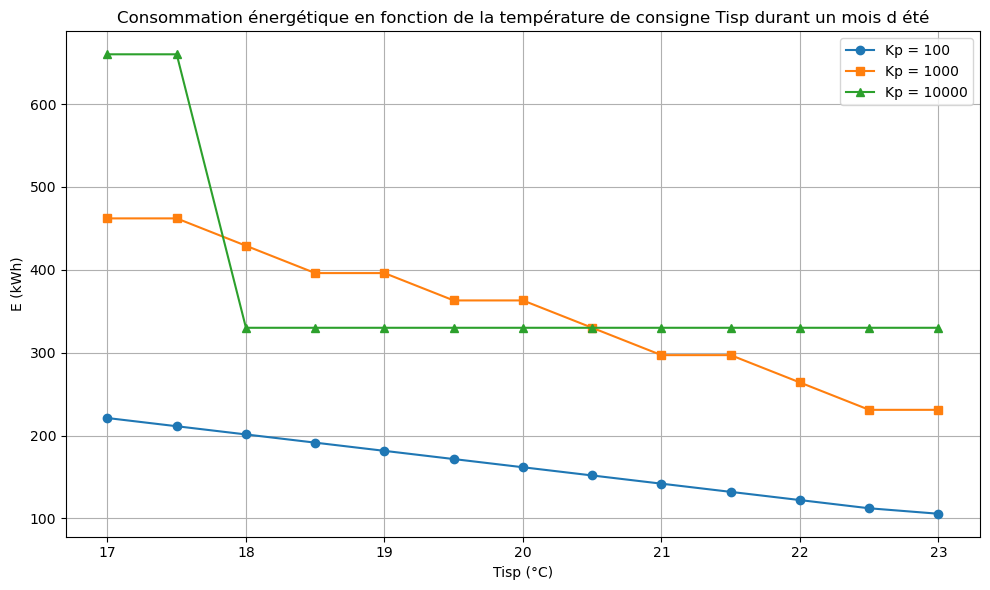

In [22]:
import numpy as np
import matplotlib.pyplot as plt

## T0=30°C

Tisp=[17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23]
Theta_in1=[23.7,23.9,24.1,24.3,24.5,24.7,24.9,25.1,25.3,25.5,25.7,25.9,26.2]
Theta_in2=[18.4,18.9,19.3,19.7,20.2,20.6,21.1,21.5,21.9,22.4,22.8,23.2,23.7]
Theta_in3=[17.2,17.7,18.1,18.6,19.1,19.6,20.1,20.6,21.1,21.6,22.1,22.6,23.1]
Kp_1=100
Kp_2=1000
Kp_3=10000
q1=np.zeros(len(Tisp))
q2=np.zeros(len(Tisp))
q3=np.zeros(len(Tisp))
E1=np.zeros(len(Tisp))
E2=np.zeros(len(Tisp))
E3=np.zeros(len(Tisp))
dt=30*11 #consommation sur 1 mois d'été avec une utilisation de la clim 11h/jour
for i in range(len(Tisp)):
    q1[i]=abs(Kp_1*(Tisp[i]-Theta_in1[i]))
    q2[i]=abs(Kp_2*(Tisp[i]-Theta_in2[i]))
    q3[i]=abs(Kp_3*(Tisp[i]-Theta_in3[i]))
    E1[i]=(dt*q1[i])/1000
    E2[i]=(dt*q2[i])/1000
    E3[i]=(dt*q3[i])/1000


# Tracé des courbes
plt.figure(figsize=(10, 6))
plt.plot(Tisp, E1, label='Kp = 100', marker='o')
plt.plot(Tisp, E2, label='Kp = 1000', marker='s')
plt.plot(Tisp, E3, label='Kp = 10000', marker='^')

# Ajout des éléments du graphique
plt.title('Consommation énergétique en fonction de la température de consigne Tisp durant un mois d été')
plt.xlabel('Tisp (°C)')
plt.ylabel('E (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Affichage
plt.show()

As previously explained, the graph shows how energy consumption (E) evolves with respect to the setpoint temperature (Tisp) for three different values of the controller gain Kp, under summer conditions (with an outdoor temperature T0 = 30°C).

We observe that for lower values of Tisp, higher values of Kp lead to increased energy consumption. However, the graph reveals different types of behavior depending on the value of Kp. Specifically, the curves corresponding to Kp = 100 and 1,000 exhibit a linear or nearly linear trend: as the setpoint temperature increases, the energy consumption decreases. This result is expected and quite intuitive in summer, setting a lower indoor temperature (i.e. a lower setpoint) requires more energy to maintain, while setting it higher reduces the cooling demand and thus energy usage.

In contrast, the curve for Kp = 10,000 shows a markedly different behavior. Initially, between 17°C and 17.5°C, energy consumption remains relatively stable. Beyond this point, there is a sharp drop in consumption, which reaches approximately 325 kWh. From 18°C up to 23°C, the energy consumption plateaus and remains constant at this lower level.

This indicates that with a high controller gain of 10,000, it is possible to achieve significantly better thermal comfort (i.e., lower indoor temperatures) without increasing energy consumption beyond a certain point. However, it's important to note that overall, this setup still consumes more energy than systems with lower gains (Kp = 100 or 1,000).

We then repeat the same process for winter conditions, assuming an outdoor temperature of T0 = 0°C. In this case, we calculate the total energy consumption E over the course of a month, with the heating system operating for 20 hours per day (the value of Theta_in 1,2 and 3 are computed with the previous code).

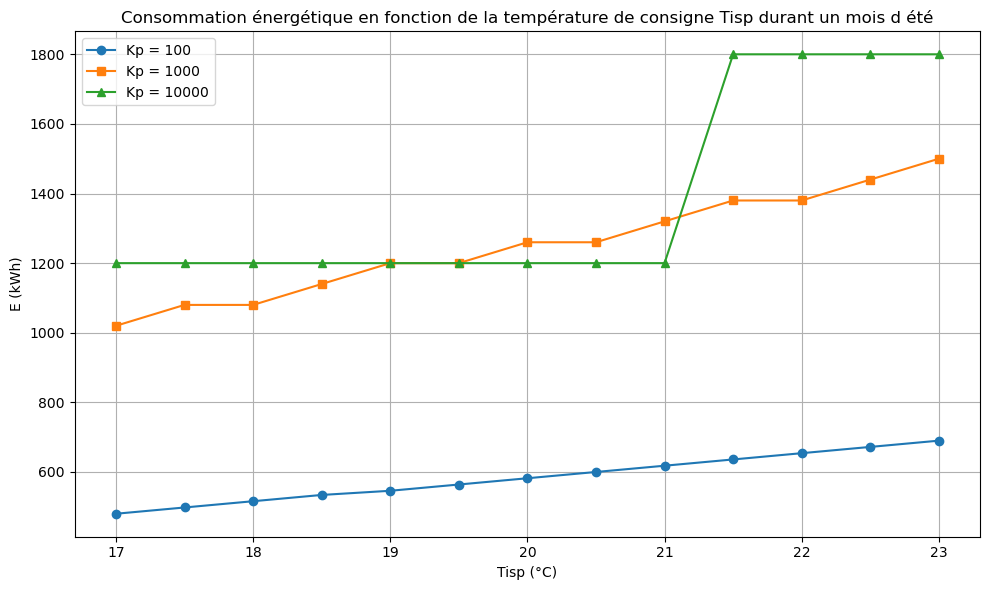

In [23]:
import numpy as np
import matplotlib.pyplot as plt

## T0=0°C

Tisp=[17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23]
Theta_in1=[9,9.2,9.4,9.6,9.9,10.1,10.3,10.5,10.7,10.9,11.1,11.3,11.5]
Theta_in2=[15.3,15.7,16.2,16.6,17,17.5,17.9,18.4,18.8,19.2,19.7,20.1,20.5]
Theta_in3=[16.8,17.3,17.8,18.3,18.8,19.3,19.8,20.3,20.8,21.2,21.7,22.2,22.7]
Kp_1=100
Kp_2=1000
Kp_3=10000
q1=np.zeros(len(Tisp))
q2=np.zeros(len(Tisp))
q3=np.zeros(len(Tisp))
E1=np.zeros(len(Tisp))
E2=np.zeros(len(Tisp))
E3=np.zeros(len(Tisp))
dt=30*20 #consommation sur 1 mois d'été avec une utilisation du chauffage 20h/jour
for i in range(len(Tisp)):
    q1[i]=abs(Kp_1*(Tisp[i]-Theta_in1[i]))
    q2[i]=abs(Kp_2*(Tisp[i]-Theta_in2[i]))
    q3[i]=abs(Kp_3*(Tisp[i]-Theta_in3[i]))
    E1[i]=(dt*q1[i])/1000
    E2[i]=(dt*q2[i])/1000
    E3[i]=(dt*q3[i])/1000


# Tracé des courbes
plt.figure(figsize=(10, 6))
plt.plot(Tisp, E1, label='Kp = 100', marker='o')
plt.plot(Tisp, E2, label='Kp = 1000', marker='s')
plt.plot(Tisp, E3, label='Kp = 10000', marker='^')

# Ajout des éléments du graphique
plt.title('Consommation énergétique en fonction de la température de consigne Tisp durant un mois d été')
plt.xlabel('Tisp (°C)')
plt.ylabel('E (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Affichage
plt.show()

As previously explained, the graph shows how energy consumption (E) evolves with respect to the setpoint temperature (Tisp) for three different values of the controller gain Kp, under winter conditions (with an outdoor temperature T0 = 0°C).

We observe that for higher values of Tisp, higher values of Kp lead to increased energy consumption. However, the graph reveals different types of behavior depending on the value of Kp. Specifically, the curves corresponding to Kp = 100 and 1,000 exhibit a linear or nearly linear trend: as the setpoint temperature increases, the energy consumption increase. This result is expected and quite intuitive in winter, setting a higher indoor temperature (i.e. a higher setpoint) requires more energy to maintain, while setting it lower reduces the heating demand and thus energy usage.

In contrast, the curve for Kp = 10,000 shows a markedly different behavior. Initially, between 17°C and 21°C, energy consumption remains relatively stable. Beyond this point, there is a sharp increase in consumption, which reaches approximately 1000 kWh. From 21,5°C up to 23°C, the energy consumption plateaus and remains constant at this higher level.

This indicates that with a high controller gain of 10,000, it is possible to achieve better thermal comfort (i.e., higher indoor temperatures) without increasing energy consumption beyond a certain point. However, it's important to note that overall, this setup still consumes more energy than systems with lower gains (Kp = 100 or 1,000).

In [24]:
x=G[5,5]
G[3,3]=G[5,5]
G[6,6]=G[5,5]
G[3,3]=G[4,4] = x
y=G[21,21]
G[24,24]=G[21,21]
G[22,22]=G[21,21]
G[24,24]=G[23,23] = y
print(f'θ = {np.around(θ, 1)} °C')

print(f'Bathroom = {np.around(θ[5], 1)} °C')
print(f'Living room = {np.around(θ[9], 1)} °C')

θ = [30.7 30.7 30.6 29.1 27.6 27.4 24.5 23.9 23.2 20.2 29.4 27.4 23.8 20.2
 31.6 20.6 25.6 30.5 30.7 30.9] °C
Bathroom = 27.4 °C
Living room = 20.2 °C


This part of the code shows that switching from internal to external insulation does not change the results. This outcome is somewhat unexpected, as we would normally anticipate differences in the thermal behavior. There are a couple of possible explanations for this.

First, we do not differentiate between the absorption coefficients of the insulation material and the concrete wall, which could significantly influence the internal temperature.
Second, the variations in temperature or energy consumption might be too small to be detected by the model due to its resolution or level of simplification.

Note: If you intend to run the next section of the code, make sure to convert the code above into a Markdown cell to avoid execution errors.

Next, in an effort to reduce the internal temperature of the house, one potential strategy could be to decrease the glazed surface area by half and replace it with a larger surface area of concrete wall.

The rationale behind this approach is that glass typically has a lower thermal mass and allows more solar radiation to enter, leading to higher internal temperatures. By increasing the proportion of concrete, which has a higher thermal mass and lower solar transmittance, the building can absorb and store more heat, helping to moderate temperature fluctuations and lower indoor temperatures.

In [25]:
import numpy as np
import pandas as pd
insulation_bathroom = {'Conductivity': 0.027,        # W/(m·K)
              'Density': 50.0,              # kg/m³
              'Specific heat': 840,        # J/(kg⋅K)
              'Width': 0.1,                # m
              'Surface': 5*3+2*3+1*3}          # m²
insulation_salon = {'Conductivity': 0.027,        # W/(m·K)
              'Density': 50.0,              # kg/m³
              'Specific heat': 840,        # J/(kg⋅K)
              'Width': 0.1,                # m
              'Surface': 5*3*2+2.5*3}          # m²
glass_salon = {'Conductivity': 1.4,               # W/(m·K)
         'Density': 2500,                   # kg/m³
         'Specific heat': 1210,             # J/(kg⋅K)
         'Width': 0.024,                     # m
         'Surface': 2.5*3}                   # m²
glass_bathroom = {'Conductivity': 1.4,               # W/(m·K)
         'Density': 2500,                   # kg/m³
         'Specific heat': 1210,             # J/(kg⋅K)
         'Width': 0.024,                     # m
         'Surface': 1*3}                   # m²
concrete_extern_bathroom = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.2,                   # m
            'Surface': 5*3+2*3+1*3}            # m²
concrete_extern_salon = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.2,                   # m
            'Surface': 5*3+2*3+2.5*3}            # m²

air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/(kg·K)
pd.DataFrame(air, index=['Air'])

concrete_intern_salon = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.075,                   # m
            'Surface': 5*3}            # m²

concrete_intern_bathroom = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.075,                   # m
            'Surface': 5*3}            # m²

ceiling_soil_bathroom = {                    # m
         'Surface': 2*5*2}  

ceiling_soil_salon = {                    # m
         'Surface': 2*5*5}  
door = {'Conductivity' : 0.17,
        'Width' : 5,
        'Surface' : 0.9*2.1,
        'Specific heat' : 2000,
        'Density' : 800 }

wall_salon = pd.DataFrame.from_dict({'Layer_out': concrete_extern_salon,
                                     'Layer_out1': concrete_intern_bathroom,
                               'Layer_in': insulation_salon,
                               'Layer_in1': insulation_bathroom,
                               'Glass': glass_salon,
                               'Glass1': glass_bathroom,
                               'Layer_out2' : concrete_extern_bathroom,
                               'roof' : ceiling_soil_bathroom,
                               'roof1' : ceiling_soil_salon,
                               'door' : door
                               },
                              orient='index')
wall_salon

wall_bathroom = pd.DataFrame.from_dict({'Layer_out': concrete_extern_salon,
                                     'Layer_out1': concrete_intern_bathroom,
                               'Layer_in': insulation_salon,
                               'Layer_in1': insulation_bathroom,
                               'Glass': glass_salon,
                               'Glass1': glass_bathroom,
                               'Layer_out2' : concrete_extern_bathroom,
                               'roof' : ceiling_soil_bathroom,
                               'roof1' : ceiling_soil_salon,
                               'door' : door
                               },
                              orient='index')
wall_bathroom


σ = 5.67e-8     # W/(m²⋅K⁴) Stefan-Bolzmann constant

h = pd.DataFrame([{'in': 8., 'out': 25}], index=['h'])  # W/(m²⋅K)
h

G = np.zeros((27,27))

# ventilation flow rate
Va_bathroom = 5*2*3                 # m³, volume of air
Va_salon = 5*5*3                 # m³, volume of air
ACH = 1                     # 1/h, air changes per hour
Va_dot_bathroom = ACH / 3600 * Va_bathroom  # m³/s, air infiltration
Va_dot_salon = ACH / 3600 * Va_salon  # m³/s, air infiltration
Kp = 1000 # W/K

# ventilation & advection
G[0,0]= air['Density'] * air['Specific heat'] * Va_dot_bathroom
G[26,26] = air['Density'] * air['Specific heat'] * Va_dot_salon
G[1,1]=Kp
G[2,2] = h['out'] * (wall_bathroom['Surface'].iloc[6]-3*2)     # on enlève la partie du mur négligée
G[3,3] = 2*(wall_bathroom['Surface'].iloc[6]-3*2)*wall_bathroom['Conductivity'].iloc[6]/wall_bathroom['Width'].iloc[6]    # on enlève la partie du mur négligée
G[4,4] = G[3,3]
G[5,5]= 2*(wall_bathroom['Surface'].iloc[3]-3*2)*wall_bathroom['Conductivity'].iloc[3]/wall_bathroom['Width'].iloc[3]     # on enlève la partie du mur négligée
G[6,6] = G[5,5]
G[7,7]= h['in'] * (wall_bathroom['Surface'].iloc[3]-3*2)  # on enlève la partie du mur négligée
G[8,8]=h['in'] * wall_bathroom['Surface'].iloc[1]
G[9,9]=2*wall_bathroom['Surface'].iloc[1]*wall_bathroom['Conductivity'].iloc[1]/wall_bathroom['Width'].iloc[1]
G[10,10]=2*wall_bathroom['Surface'].iloc[1]*wall_bathroom['Conductivity'].iloc[1]/wall_bathroom['Width'].iloc[1]
G[11,11]= h['in'] * wall_salon['Surface'].iloc[1]
G[12,12]= h['in'] * wall_salon['Surface'].iloc[4]
G[13,13]= h['out'] * wall_salon['Surface'].iloc[4]
G[14,14]= h['in'] * wall_bathroom['Surface'].iloc[5]
G[15,15]= h['in'] * wall_bathroom['Surface'].iloc[9]
G[16,16]= 2*door['Surface']*door['Conductivity']/door['Width']
G[17,17]=G[16,16]
G[18,18]= h['in'] * wall_salon['Surface'].iloc[9]
G[19,19]= h['in'] * (wall_salon['Surface'].iloc[2]-5*3)
G[20,20]= h['out'] * wall_bathroom['Surface'].iloc[5]
G[21,21]= 2*(wall_salon['Surface'].iloc[2]-5*3)*wall_bathroom['Conductivity'].iloc[2]/wall_bathroom['Width'].iloc[2]
G[22,22]=G[21,21]
G[23,23]=2*(wall_salon['Surface'].iloc[0]-5*3)*wall_bathroom['Conductivity'].iloc[0]/wall_bathroom['Width'].iloc[0]
G[24,24]= G[23,23]
G[25,25]=h['out'] * wall_salon['Surface'].iloc[0]
    
nr = 27
nc= 20

A = np.zeros([nr, nc])



A[0, 5] = 1
A[1, 9] = 1
A[2, 0] = 1

j=0
for i in range(3,13):
    A[i,j], A[i,j+1] = -1, 1
    j+=1
    
A[13, 10] = 1
A[14, 14], A[14, 5] = -1, 1
A[14, 14], A[14, 5] = -1, 1
A[15, 5], A[15, 11] = -1, 1
A[16, 11], A[16, 12] = -1, 1
A[17, 12], A[17, 13] = -1, 1
A[18, 13], A[18, 9] = -1, 1
A[19, 15], A[19, 9] = -1, 1
A[20, 14] = 1
 
j=15
for i in range(21,25):
    A[i,j+1], A[i,j] = -1, 1
    j+=1
    
A[25, 19] = 1
A[26, 9] = 1

f = np.zeros(20)  

# flow-rate sources f for steady state

# ----- C matrix -----

T0=30 #données météo
Tisp=19 # à déinir
air_bathroom = {'Conductivity': 1.4,               # W/(m·K)
          'Density': 1.2,                      # kg/m³                  
          'Specific heat': 1000,             # J/(kg⋅K)
          'Volume': 30, }                    # m^3

air_salon = {'Conductivity': 1.4,               # W/(m·K)
          'Density': 1.2,                      # kg/m³                  
          'Specific heat': 1000,             # J/(kg⋅K)
          'Volume': 75, }                    # m^3
                  

# ----- b and f vectors -----

b = np.zeros(27)
b[0]=b[2]=b[13]=b[20]=b[25]=T0
b[1]=Tisp    

Es = 307 #W/m²
Ew = 391 #W/m²
En = 150 #W/m²

# radiative properties
ε_wLW = 0.85    # long wave emmisivity: wall surface (concrete)
ε_gLW = 0.90    # long wave emmisivity: glass pyrex
α_wSW = 0.25    # short wave absortivity: white smooth surface
α_gSW = 0.38    # short wave absortivity: reflective blue glass
τ_gSW = 0.30    # short wave transmitance: reflective blue glass

# view factor
Fwall_ground = 0.5
Fwall_sky = 0.5
Fw_externgbathroom = (concrete_extern_bathroom['Surface']-3*2) / (glass_bathroom['Surface']+concrete_intern_bathroom['Surface']+ceiling_soil_bathroom['Surface'])
Fw_interngbathroom = (concrete_intern_bathroom['Surface']) / (glass_bathroom['Surface']+concrete_extern_bathroom['Surface']+ceiling_soil_bathroom['Surface'])
Fw_externgsalon = (concrete_extern_salon['Surface']-3*5) / (glass_salon['Surface']+concrete_intern_salon['Surface']+ceiling_soil_salon['Surface'])
Fw_interngsalon = (concrete_intern_salon['Surface']) / (glass_salon['Surface']+concrete_extern_salon['Surface']+ceiling_soil_salon['Surface'])

phi0 = Fwall_sky*En*(concrete_extern_bathroom['Surface']-2*3)*α_wSW
phi14 = Fwall_sky*Ew*glass_bathroom['Surface']*α_gSW
phi10 = Fwall_sky*Es*glass_salon['Surface']*α_gSW
phi19 = Fwall_sky*Ew*concrete_extern_salon['Surface']*α_wSW/2
phi4 = Fw_externgbathroom*phi14*τ_gSW*α_wSW
phi6 = Fw_interngbathroom*phi14*τ_gSW*α_wSW
phi8 = Fw_interngsalon*phi10*τ_gSW*α_wSW
phi15 = Fw_externgsalon*phi10*τ_gSW*α_wSW
Qa1 = 90+70 # one standing people and some machine in W
Qa2 = 90 # one standing people in W

f=[phi0, 0, 0, 0, phi4, Qa2, phi6, 0, phi8, Qa1, phi10, 0, 0, 0, phi14, phi15, 0, 0, 0, phi19 ]


# temperature nodes
nθ = 20      # number of temperature nodes
θ = [f'θ{i}' for i in range(nθ)]

# flow-rate branches
nq = 27     # number of flow branches
q = [f'q{i}' for i in range(nq)]


θ = np.linalg.inv(A.T @ G @ A ) @ (A.T @ G @ b + f)
print(f'θ = {np.around(θ, 1)} °C')

a=wall_bathroom['Width'].iloc[3]
print(a , 'test')

print(f'Bathroom = {np.around(θ[5], 1)} °C')
print(f'Living room = {np.around(θ[9], 1)} °C')

print(f'θ = {np.around(θ, 1)} °C')
print(f'Bathroom = {np.around(θ[5], 1)} °C')
print(f'Living room = {np.around(θ[9], 1)} °C')

θ = [30.7 30.6 30.5 28.2 25.9 25.7 23.2 22.7 22.2 19.6 29.3 25.7 22.7 19.6
 31.2 20.  25.1 30.2 30.6 30.9] °C
0.1 test
Bathroom = 25.7 °C
Living room = 19.6 °C
θ = [30.7 30.6 30.5 28.2 25.9 25.7 23.2 22.7 22.2 19.6 29.3 25.7 22.7 19.6
 31.2 20.  25.1 30.2 30.6 30.9] °C
Bathroom = 25.7 °C
Living room = 19.6 °C


C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\3097308122.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[2,2] = h['out'] * (wall_bathroom['Surface'].iloc[6]-3*2)     # on enlève la partie du mur négligée
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\3097308122.py:114: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[7,7]= h['in'] * (wall_bathroom['Surface'].iloc[3]-3*2)  # on enlève la partie du mur négligée
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\3097308122.py:115: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[8,8]=h['in'] * wall_bathroom['Surface'].iloc[1]
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\3097308122.py:118: FutureWarning: Calling float on a 

The results above correspond to the summer period (with an outdoor temperature of 30°C), and they clearly demonstrate that reducing the window surface significantly improves the thermal comfort of the house.
In the bathroom, for instance, the temperature with the standard window configuration was 27.4°C. After reducing the window size, the temperature dropped to 25.7°C a notable decrease of 1.7°C. This is a substantial improvement.
Similarly, in the living room, we observe a temperature reduction from 20.2°C to 19.6°C, a decrease of 0.6°C.

These results strongly highlight the importance of limiting window surface area during the summer months, as it can significantly reduce indoor temperatures and enhance comfort.

In [26]:
import numpy as np
import pandas as pd
insulation_bathroom = {'Conductivity': 0.027,        # W/(m·K)
              'Density': 50.0,              # kg/m³
              'Specific heat': 840,        # J/(kg⋅K)
              'Width': 0.1,                # m
              'Surface': 5*3+2*3}          # m²
insulation_salon = {'Conductivity': 0.027,        # W/(m·K)
              'Density': 50.0,              # kg/m³
              'Specific heat': 840,        # J/(kg⋅K)
              'Width': 0.1,                # m
              'Surface': 5*3*2}          # m²
glass_salon = {'Conductivity': 1.4,               # W/(m·K)
         'Density': 2500,                   # kg/m³
         'Specific heat': 1210,             # J/(kg⋅K)
         'Width': 0.024,                     # m
         'Surface': 5*3}                   # m²
glass_bathroom = {'Conductivity': 1.4,               # W/(m·K)
         'Density': 2500,                   # kg/m³
         'Specific heat': 1210,             # J/(kg⋅K)
         'Width': 0.024,                     # m
         'Surface': 2*3}                   # m²
concrete_extern_bathroom = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.2,                   # m
            'Surface': 5*3+2*3}            # m²
concrete_extern_salon = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.2,                   # m
            'Surface': 5*3+2*3}            # m²

air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/(kg·K)
pd.DataFrame(air, index=['Air'])

concrete_intern_salon = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.075,                   # m
            'Surface': 5*3}            # m²

concrete_intern_bathroom = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.075,                   # m
            'Surface': 5*3}            # m²

ceiling_soil_bathroom = {                    # m
         'Surface': 2*5*2}  

ceiling_soil_salon = {                    # m
         'Surface': 2*5*5}  
door = {'Conductivity' : 0.17,
        'Width' : 5,
        'Surface' : 0.9*2.1,
        'Specific heat' : 2000,
        'Density' : 800 }

wall_salon = pd.DataFrame.from_dict({'Layer_out': concrete_extern_salon,
                                     'Layer_out1': concrete_intern_bathroom,
                               'Layer_in': insulation_salon,
                               'Layer_in1': insulation_bathroom,
                               'Glass': glass_salon,
                               'Glass1': glass_bathroom,
                               'Layer_out2' : concrete_extern_bathroom,
                               'roof' : ceiling_soil_bathroom,
                               'roof1' : ceiling_soil_salon,
                               'door' : door
                               },
                              orient='index')
wall_salon

wall_bathroom = pd.DataFrame.from_dict({'Layer_out': concrete_extern_salon,
                                     'Layer_out1': concrete_intern_bathroom,
                               'Layer_in': insulation_salon,
                               'Layer_in1': insulation_bathroom,
                               'Glass': glass_salon,
                               'Glass1': glass_bathroom,
                               'Layer_out2' : concrete_extern_bathroom,
                               'roof' : ceiling_soil_bathroom,
                               'roof1' : ceiling_soil_salon,
                               'door' : door
                               },
                              orient='index')
wall_bathroom


σ = 5.67e-8     # W/(m²⋅K⁴) Stefan-Bolzmann constant

h = pd.DataFrame([{'in': 8., 'out': 25}], index=['h'])  # W/(m²⋅K)
h

G = np.zeros((27,27))

# ventilation flow rate
Va_bathroom = 5*2*3                 # m³, volume of air
Va_salon = 5*5*3                 # m³, volume of air
ACH = 1                     # 1/h, air changes per hour
Va_dot_bathroom = ACH / 3600 * Va_bathroom  # m³/s, air infiltration
Va_dot_salon = ACH / 3600 * Va_salon  # m³/s, air infiltration
Kp = 1000 # W/K

# ventilation & advection
G[0,0]= air['Density'] * air['Specific heat'] * Va_dot_bathroom
G[26,26] = air['Density'] * air['Specific heat'] * Va_dot_salon
G[1,1]=Kp
G[2,2] = h['out'] * (wall_bathroom['Surface'].iloc[6]-3*2)     # on enlève la partie du mur négligée
G[3,3] = 2*(wall_bathroom['Surface'].iloc[6]-3*2)*wall_bathroom['Conductivity'].iloc[6]/wall_bathroom['Width'].iloc[6]    # on enlève la partie du mur négligée
G[4,4] = G[3,3]
G[5,5]= 2*(wall_bathroom['Surface'].iloc[3]-3*2)*wall_bathroom['Conductivity'].iloc[3]/wall_bathroom['Width'].iloc[3]     # on enlève la partie du mur négligée
G[6,6] = G[5,5]
G[7,7]= h['in'] * (wall_bathroom['Surface'].iloc[3]-3*2)  # on enlève la partie du mur négligée
G[8,8]=h['in'] * wall_bathroom['Surface'].iloc[1]
G[9,9]=2*wall_bathroom['Surface'].iloc[1]*wall_bathroom['Conductivity'].iloc[1]/wall_bathroom['Width'].iloc[1]
G[10,10]=2*wall_bathroom['Surface'].iloc[1]*wall_bathroom['Conductivity'].iloc[1]/wall_bathroom['Width'].iloc[1]
G[11,11]= h['in'] * wall_salon['Surface'].iloc[1]
G[12,12]= h['in'] * wall_salon['Surface'].iloc[4]
G[13,13]= h['out'] * wall_salon['Surface'].iloc[4]
G[14,14]= h['in'] * wall_bathroom['Surface'].iloc[5]
G[15,15]= h['in'] * wall_bathroom['Surface'].iloc[9]
G[16,16]= 2*door['Surface']*door['Conductivity']/door['Width']
G[17,17]=G[16,16]
G[18,18]= h['in'] * wall_salon['Surface'].iloc[9]
G[19,19]= h['in'] * (wall_salon['Surface'].iloc[2]-5*3)
G[20,20]= h['out'] * wall_bathroom['Surface'].iloc[5]
G[21,21]= 2*(wall_salon['Surface'].iloc[2]-5*3)*wall_bathroom['Conductivity'].iloc[2]/wall_bathroom['Width'].iloc[2]
G[22,22]=G[21,21]
G[23,23]=2*(wall_salon['Surface'].iloc[0]-5*3)*wall_bathroom['Conductivity'].iloc[0]/wall_bathroom['Width'].iloc[0]
G[24,24]= G[23,23]
G[25,25]=h['out'] * wall_salon['Surface'].iloc[0]
    
nr = 27
nc= 20

A = np.zeros([nr, nc])



A[0, 5] = 1
A[1, 9] = 1
A[2, 0] = 1

j=0
for i in range(3,13):
    A[i,j], A[i,j+1] = -1, 1
    j+=1
    
A[13, 10] = 1
A[14, 14], A[14, 5] = -1, 1
A[14, 14], A[14, 5] = -1, 1
A[15, 5], A[15, 11] = -1, 1
A[16, 11], A[16, 12] = -1, 1
A[17, 12], A[17, 13] = -1, 1
A[18, 13], A[18, 9] = -1, 1
A[19, 15], A[19, 9] = -1, 1
A[20, 14] = 1
 
j=15
for i in range(21,25):
    A[i,j+1], A[i,j] = -1, 1
    j+=1
    
A[25, 19] = 1
A[26, 9] = 1

f = np.zeros(20)  

# flow-rate sources f for steady state

# ----- C matrix -----

T0=0 #données météo
Tisp=19 # à déinir
air_bathroom = {'Conductivity': 1.4,               # W/(m·K)
          'Density': 1.2,                      # kg/m³                  
          'Specific heat': 1000,             # J/(kg⋅K)
          'Volume': 30, }                    # m^3

air_salon = {'Conductivity': 1.4,               # W/(m·K)
          'Density': 1.2,                      # kg/m³                  
          'Specific heat': 1000,             # J/(kg⋅K)
          'Volume': 75, }                    # m^3
                  

# ----- b and f vectors -----

b = np.zeros(27)
b[0]=b[2]=b[13]=b[20]=b[25]=T0
b[1]=Tisp    

Es = 307 #W/m²
Ew = 391 #W/m²
En = 150 #W/m²

# radiative properties
ε_wLW = 0.85    # long wave emmisivity: wall surface (concrete)
ε_gLW = 0.90    # long wave emmisivity: glass pyrex
α_wSW = 0.25    # short wave absortivity: white smooth surface
α_gSW = 0.38    # short wave absortivity: reflective blue glass
τ_gSW = 0.30    # short wave transmitance: reflective blue glass

# view factor
Fwall_ground = 0.5
Fwall_sky = 0.5
Fw_externgbathroom = (concrete_extern_bathroom['Surface']-3*2) / (glass_bathroom['Surface']+concrete_intern_bathroom['Surface']+ceiling_soil_bathroom['Surface'])
Fw_interngbathroom = (concrete_intern_bathroom['Surface']) / (glass_bathroom['Surface']+concrete_extern_bathroom['Surface']+ceiling_soil_bathroom['Surface'])
Fw_externgsalon = (concrete_extern_salon['Surface']-3*5) / (glass_salon['Surface']+concrete_intern_salon['Surface']+ceiling_soil_salon['Surface'])
Fw_interngsalon = (concrete_intern_salon['Surface']) / (glass_salon['Surface']+concrete_extern_salon['Surface']+ceiling_soil_salon['Surface'])

phi0 = Fwall_sky*En*(concrete_extern_bathroom['Surface']-2*3)*α_wSW
phi14 = Fwall_sky*Ew*glass_bathroom['Surface']*α_gSW
phi10 = Fwall_sky*Es*glass_salon['Surface']*α_gSW
phi19 = Fwall_sky*Ew*concrete_extern_salon['Surface']*α_wSW/2
phi4 = Fw_externgbathroom*phi14*τ_gSW*α_wSW
phi6 = Fw_interngbathroom*phi14*τ_gSW*α_wSW
phi8 = Fw_interngsalon*phi10*τ_gSW*α_wSW
phi15 = Fw_externgsalon*phi10*τ_gSW*α_wSW
Qa1 = 90+70 # one standing people and some machine in W
Qa2 = 90 # one standing people in W

f=[phi0, 0, 0, 0, phi4, Qa2, phi6, 0, phi8, Qa1, phi10, 0, 0, 0, phi14, phi15, 0, 0, 0, phi19 ]


# temperature nodes
nθ = 20      # number of temperature nodes
θ = [f'θ{i}' for i in range(nθ)]

# flow-rate branches
nq = 27     # number of flow branches
q = [f'q{i}' for i in range(nq)]


θ = np.linalg.inv(A.T @ G @ A ) @ (A.T @ G @ b + f)
print(f'θ = {np.around(θ, 1)} °C')

a=wall_bathroom['Width'].iloc[3]
print(a , 'test')

print(f'Bathroom = {np.around(θ[5], 1)} °C')
print(f'Living room = {np.around(θ[9], 1)} °C')

print(f'θ = {np.around(θ, 1)} °C')
print(f'Bathroom = {np.around(θ[5], 1)} °C')
print(f'Living room = {np.around(θ[9], 1)} °C')

θ = [ 0.9  1.   1.2  5.9 10.5 10.7 13.4 14.  14.5 17.   5.9 10.7 13.9 17.
  4.8 16.6  9.5  2.5  1.8  1.1] °C
0.1 test
Bathroom = 10.7 °C
Living room = 17.0 °C
θ = [ 0.9  1.   1.2  5.9 10.5 10.7 13.4 14.  14.5 17.   5.9 10.7 13.9 17.
  4.8 16.6  9.5  2.5  1.8  1.1] °C
Bathroom = 10.7 °C
Living room = 17.0 °C


C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\3383110198.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[2,2] = h['out'] * (wall_bathroom['Surface'].iloc[6]-3*2)     # on enlève la partie du mur négligée
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\3383110198.py:114: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[7,7]= h['in'] * (wall_bathroom['Surface'].iloc[3]-3*2)  # on enlève la partie du mur négligée
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\3383110198.py:115: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[8,8]=h['in'] * wall_bathroom['Surface'].iloc[1]
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\3383110198.py:118: FutureWarning: Calling float on a 

This section of the code presents the results for the winter period using the standard window configuration.
These results will serve as a reference point for comparison when evaluating the impact of reducing the window surface area by half. By doing so, we aim to assess how modifying the glazing area influences indoor thermal comfort during the colder months.

In [27]:
import numpy as np
import pandas as pd
insulation_bathroom = {'Conductivity': 0.027,        # W/(m·K)
              'Density': 50.0,              # kg/m³
              'Specific heat': 840,        # J/(kg⋅K)
              'Width': 0.1,                # m
              'Surface': 5*3+2*3+1*3}          # m²
insulation_salon = {'Conductivity': 0.027,        # W/(m·K)
              'Density': 50.0,              # kg/m³
              'Specific heat': 840,        # J/(kg⋅K)
              'Width': 0.1,                # m
              'Surface': 5*3*2+2.5*3}          # m²
glass_salon = {'Conductivity': 1.4,               # W/(m·K)
         'Density': 2500,                   # kg/m³
         'Specific heat': 1210,             # J/(kg⋅K)
         'Width': 0.024,                     # m
         'Surface': 2.5*3}                   # m²
glass_bathroom = {'Conductivity': 1.4,               # W/(m·K)
         'Density': 2500,                   # kg/m³
         'Specific heat': 1210,             # J/(kg⋅K)
         'Width': 0.024,                     # m
         'Surface': 1*3}                   # m²
concrete_extern_bathroom = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.2,                   # m
            'Surface': 5*3+2*3+1*3}            # m²
concrete_extern_salon = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.2,                   # m
            'Surface': 5*3+2*3+2.5*3}            # m²

air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/(kg·K)
pd.DataFrame(air, index=['Air'])

concrete_intern_salon = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.075,                   # m
            'Surface': 5*3}            # m²

concrete_intern_bathroom = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 960,           # J/(kg⋅K)
            'Width': 0.075,                   # m
            'Surface': 5*3}            # m²

ceiling_soil_bathroom = {                    # m
         'Surface': 2*5*2}  

ceiling_soil_salon = {                    # m
         'Surface': 2*5*5}  
door = {'Conductivity' : 0.17,
        'Width' : 5,
        'Surface' : 0.9*2.1,
        'Specific heat' : 2000,
        'Density' : 800 }

wall_salon = pd.DataFrame.from_dict({'Layer_out': concrete_extern_salon,
                                     'Layer_out1': concrete_intern_bathroom,
                               'Layer_in': insulation_salon,
                               'Layer_in1': insulation_bathroom,
                               'Glass': glass_salon,
                               'Glass1': glass_bathroom,
                               'Layer_out2' : concrete_extern_bathroom,
                               'roof' : ceiling_soil_bathroom,
                               'roof1' : ceiling_soil_salon,
                               'door' : door
                               },
                              orient='index')
wall_salon

wall_bathroom = pd.DataFrame.from_dict({'Layer_out': concrete_extern_salon,
                                     'Layer_out1': concrete_intern_bathroom,
                               'Layer_in': insulation_salon,
                               'Layer_in1': insulation_bathroom,
                               'Glass': glass_salon,
                               'Glass1': glass_bathroom,
                               'Layer_out2' : concrete_extern_bathroom,
                               'roof' : ceiling_soil_bathroom,
                               'roof1' : ceiling_soil_salon,
                               'door' : door
                               },
                              orient='index')
wall_bathroom


σ = 5.67e-8     # W/(m²⋅K⁴) Stefan-Bolzmann constant

h = pd.DataFrame([{'in': 8., 'out': 25}], index=['h'])  # W/(m²⋅K)
h

G = np.zeros((27,27))

# ventilation flow rate
Va_bathroom = 5*2*3                 # m³, volume of air
Va_salon = 5*5*3                 # m³, volume of air
ACH = 1                     # 1/h, air changes per hour
Va_dot_bathroom = ACH / 3600 * Va_bathroom  # m³/s, air infiltration
Va_dot_salon = ACH / 3600 * Va_salon  # m³/s, air infiltration
Kp = 1000 # W/K

# ventilation & advection
G[0,0]= air['Density'] * air['Specific heat'] * Va_dot_bathroom
G[26,26] = air['Density'] * air['Specific heat'] * Va_dot_salon
G[1,1]=Kp
G[2,2] = h['out'] * (wall_bathroom['Surface'].iloc[6]-3*2)     # on enlève la partie du mur négligée
G[3,3] = 2*(wall_bathroom['Surface'].iloc[6]-3*2)*wall_bathroom['Conductivity'].iloc[6]/wall_bathroom['Width'].iloc[6]    # on enlève la partie du mur négligée
G[4,4] = G[3,3]
G[5,5]= 2*(wall_bathroom['Surface'].iloc[3]-3*2)*wall_bathroom['Conductivity'].iloc[3]/wall_bathroom['Width'].iloc[3]     # on enlève la partie du mur négligée
G[6,6] = G[5,5]
G[7,7]= h['in'] * (wall_bathroom['Surface'].iloc[3]-3*2)  # on enlève la partie du mur négligée
G[8,8]=h['in'] * wall_bathroom['Surface'].iloc[1]
G[9,9]=2*wall_bathroom['Surface'].iloc[1]*wall_bathroom['Conductivity'].iloc[1]/wall_bathroom['Width'].iloc[1]
G[10,10]=2*wall_bathroom['Surface'].iloc[1]*wall_bathroom['Conductivity'].iloc[1]/wall_bathroom['Width'].iloc[1]
G[11,11]= h['in'] * wall_salon['Surface'].iloc[1]
G[12,12]= h['in'] * wall_salon['Surface'].iloc[4]
G[13,13]= h['out'] * wall_salon['Surface'].iloc[4]
G[14,14]= h['in'] * wall_bathroom['Surface'].iloc[5]
G[15,15]= h['in'] * wall_bathroom['Surface'].iloc[9]
G[16,16]= 2*door['Surface']*door['Conductivity']/door['Width']
G[17,17]=G[16,16]
G[18,18]= h['in'] * wall_salon['Surface'].iloc[9]
G[19,19]= h['in'] * (wall_salon['Surface'].iloc[2]-5*3)
G[20,20]= h['out'] * wall_bathroom['Surface'].iloc[5]
G[21,21]= 2*(wall_salon['Surface'].iloc[2]-5*3)*wall_bathroom['Conductivity'].iloc[2]/wall_bathroom['Width'].iloc[2]
G[22,22]=G[21,21]
G[23,23]=2*(wall_salon['Surface'].iloc[0]-5*3)*wall_bathroom['Conductivity'].iloc[0]/wall_bathroom['Width'].iloc[0]
G[24,24]= G[23,23]
G[25,25]=h['out'] * wall_salon['Surface'].iloc[0]
    
nr = 27
nc= 20

A = np.zeros([nr, nc])



A[0, 5] = 1
A[1, 9] = 1
A[2, 0] = 1

j=0
for i in range(3,13):
    A[i,j], A[i,j+1] = -1, 1
    j+=1
    
A[13, 10] = 1
A[14, 14], A[14, 5] = -1, 1
A[14, 14], A[14, 5] = -1, 1
A[15, 5], A[15, 11] = -1, 1
A[16, 11], A[16, 12] = -1, 1
A[17, 12], A[17, 13] = -1, 1
A[18, 13], A[18, 9] = -1, 1
A[19, 15], A[19, 9] = -1, 1
A[20, 14] = 1
 
j=15
for i in range(21,25):
    A[i,j+1], A[i,j] = -1, 1
    j+=1
    
A[25, 19] = 1
A[26, 9] = 1

f = np.zeros(20)  

# flow-rate sources f for steady state

# ----- C matrix -----

T0=0 #données météo
Tisp=19 # à déinir
air_bathroom = {'Conductivity': 1.4,               # W/(m·K)
          'Density': 1.2,                      # kg/m³                  
          'Specific heat': 1000,             # J/(kg⋅K)
          'Volume': 30, }                    # m^3

air_salon = {'Conductivity': 1.4,               # W/(m·K)
          'Density': 1.2,                      # kg/m³                  
          'Specific heat': 1000,             # J/(kg⋅K)
          'Volume': 75, }                    # m^3
                  

# ----- b and f vectors -----

b = np.zeros(27)
b[0]=b[2]=b[13]=b[20]=b[25]=T0
b[1]=Tisp    

Es = 307 #W/m²
Ew = 391 #W/m²
En = 150 #W/m²

# radiative properties
ε_wLW = 0.85    # long wave emmisivity: wall surface (concrete)
ε_gLW = 0.90    # long wave emmisivity: glass pyrex
α_wSW = 0.25    # short wave absortivity: white smooth surface
α_gSW = 0.38    # short wave absortivity: reflective blue glass
τ_gSW = 0.30    # short wave transmitance: reflective blue glass

# view factor
Fwall_ground = 0.5
Fwall_sky = 0.5
Fw_externgbathroom = (concrete_extern_bathroom['Surface']-3*2) / (glass_bathroom['Surface']+concrete_intern_bathroom['Surface']+ceiling_soil_bathroom['Surface'])
Fw_interngbathroom = (concrete_intern_bathroom['Surface']) / (glass_bathroom['Surface']+concrete_extern_bathroom['Surface']+ceiling_soil_bathroom['Surface'])
Fw_externgsalon = (concrete_extern_salon['Surface']-3*5) / (glass_salon['Surface']+concrete_intern_salon['Surface']+ceiling_soil_salon['Surface'])
Fw_interngsalon = (concrete_intern_salon['Surface']) / (glass_salon['Surface']+concrete_extern_salon['Surface']+ceiling_soil_salon['Surface'])

phi0 = Fwall_sky*En*(concrete_extern_bathroom['Surface']-2*3)*α_wSW
phi14 = Fwall_sky*Ew*glass_bathroom['Surface']*α_gSW
phi10 = Fwall_sky*Es*glass_salon['Surface']*α_gSW
phi19 = Fwall_sky*Ew*concrete_extern_salon['Surface']*α_wSW/2
phi4 = Fw_externgbathroom*phi14*τ_gSW*α_wSW
phi6 = Fw_interngbathroom*phi14*τ_gSW*α_wSW
phi8 = Fw_interngsalon*phi10*τ_gSW*α_wSW
phi15 = Fw_externgsalon*phi10*τ_gSW*α_wSW
Qa1 = 90+70 # one standing people and some machine in W
Qa2 = 90 # one standing people in W

f=[phi0, 0, 0, 0, phi4, Qa2, phi6, 0, phi8, Qa1, phi10, 0, 0, 0, phi14, phi15, 0, 0, 0, phi19 ]


# temperature nodes
nθ = 20      # number of temperature nodes
θ = [f'θ{i}' for i in range(nθ)]

# flow-rate branches
nq = 27     # number of flow branches
q = [f'q{i}' for i in range(nq)]


θ = np.linalg.inv(A.T @ G @ A ) @ (A.T @ G @ b + f)
print(f'θ = {np.around(θ, 1)} °C')

a=wall_bathroom['Width'].iloc[3]
print(a , 'test')

print(f'Bathroom = {np.around(θ[5], 1)} °C')
print(f'Living room = {np.around(θ[9], 1)} °C')

print(f'θ = {np.around(θ, 1)} °C')
print(f'Bathroom = {np.around(θ[5], 1)} °C')
print(f'Living room = {np.around(θ[9], 1)} °C')

θ = [ 0.9  1.1  1.3  6.8 12.3 12.6 14.7 15.2 15.6 17.7  6.1 12.6 15.1 17.7
  5.3 17.2  9.6  2.1  1.6  1.1] °C
0.1 test
Bathroom = 12.6 °C
Living room = 17.7 °C
θ = [ 0.9  1.1  1.3  6.8 12.3 12.6 14.7 15.2 15.6 17.7  6.1 12.6 15.1 17.7
  5.3 17.2  9.6  2.1  1.6  1.1] °C
Bathroom = 12.6 °C
Living room = 17.7 °C


C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\2408252534.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[2,2] = h['out'] * (wall_bathroom['Surface'].iloc[6]-3*2)     # on enlève la partie du mur négligée
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\2408252534.py:114: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[7,7]= h['in'] * (wall_bathroom['Surface'].iloc[3]-3*2)  # on enlève la partie du mur négligée
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\2408252534.py:115: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  G[8,8]=h['in'] * wall_bathroom['Surface'].iloc[1]
C:\Users\Samsung\AppData\Local\Temp\ipykernel_16412\2408252534.py:118: FutureWarning: Calling float on a 

The results above correspond to the winter period (with an outdoor temperature of 0°C), and they clearly demonstrate that reducing the window surface significantly improves the thermal comfort of the house.
In the bathroom, for instance, the temperature with the standard window configuration was 10.7°C. After reducing the window size, the temperature dropped to 12.6°C a notable increase of 1.9°C. This is a substantial improvement.
Similarly, in the living room, we observe a temperature increase from 17.0°C to 17.7°C, a increase of 0.7°C.

These results strongly highlight the importance of limiting window surface area during the winter months, as it can significantly improve indoor temperatures and enhance comfort.

# Conclusion

One of the main issues identified in the building model is the temperature in the bathroom. As discussed earlier, this is primarily due to the absence of a temperature controller in that space, combined with the fact that the interior door is modeled as opaque, preventing heat transfer between rooms.

Another important aspect is the performance of the controller itself. In the current model, the controller is assumed to operate with near-perfect precision due to a high proportional gain value. To enhance the realism of the simulation, this value should be further examined and adjusted to better reflect actual control system performance.

Additionally, the model could be improved by modifying the window design. The current windows are large and modeled with only double glazing, which contributes significantly to heat gain and loss. Improving the window properties by lowering the U-value and/or reducing the window size would result in a more energy-efficient building model. However, it is important to note that reducing the glazed area would also decrease the availability of natural light, introducing a separate set of considerations related to daylight access and occupant comfort.